In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#1 Import/Open the Listings.csv file

In [9]:
df7 = pd.read_csv(r"C:\Users\HP\Desktop\Listings.csv", encoding='ISO-8859-1', low_memory = False)

In [256]:
df7.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
#2 Cast date columns as a datetime format

In [258]:
df7["host_since"] = pd.to_datetime(df7["host_since"])

In [259]:
df7["host_since"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 279712 entries, 0 to 279711
Series name: host_since
Non-Null Count   Dtype         
--------------   -----         
279547 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.1 MB


In [ ]:
#3 Filter the data down to rows where the city is Paris, and keep only 5 columns.
# [‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’]

In [260]:
paris_data = df7[df7["city"] == "Paris"].loc[:,["host_since", "neighbourhood", "city", "accommodates", "price"]]

In [261]:
paris_data.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [ ]:
#4 QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field.

In [40]:
paris_data.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [42]:
paris_data.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [55]:
#5 Create a table named paris_listings_neighbourhood that groups Paris 
# listings by 'neighbourhood' and calculates the mean price (sorted low to high).

In [125]:
paris_listings_neighbourhood = paris_data.groupby("neighbourhood").agg({"price":"mean"}).sort_values(by = "price")

In [235]:
paris_listings_neighbourhood

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


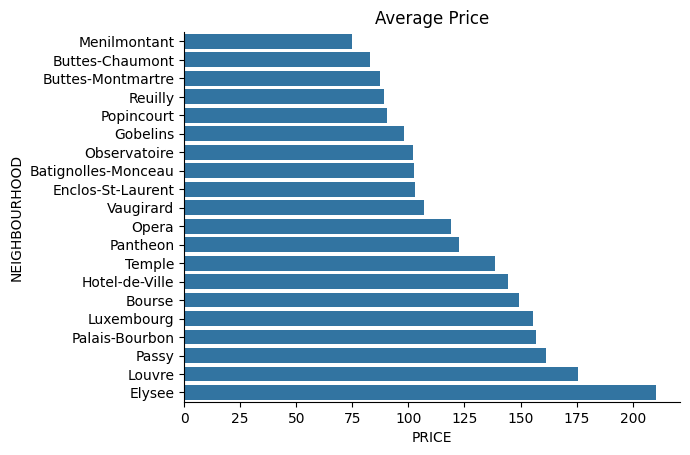

In [251]:
sns.barplot (data = paris_listings_neighbourhood, x = "price", y = "neighbourhood")
plt.title ("Average Price")
plt.xlabel ("PRICE")
plt.ylabel ("NEIGHBOURHOOD")
sns.despine()

In [ ]:
#Conclusion
#By examining this table, we can identify which neighborhoods tend to have higher (Elysee) or lower (Menilmontant) average prices. 
#Perhaps some neighborhoods are more upscale or tourist-friendly, while others are more budget-friendly.

In [241]:
#6 Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood.
# Group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high).

In [248]:
most_exp = paris_data[paris_data["neighbourhood"] == "Elysee"]

In [249]:
paris_listings_accomodations = most_exp.groupby("accommodates").agg({"price":"mean"}).sort_values(by = "price")
paris_listings_accomodations

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462


<Axes: xlabel='price', ylabel='accommodates'>

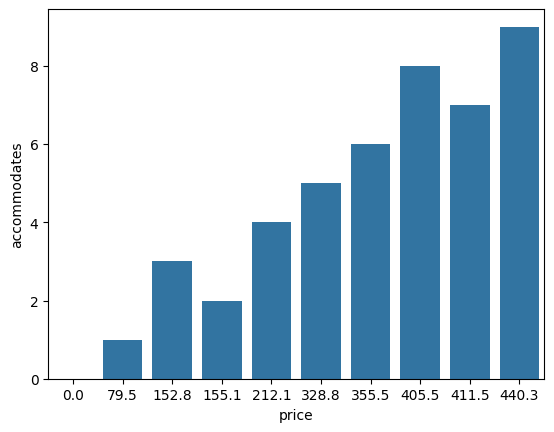

In [252]:
sns.barplot (data = paris_listing_accommodates.round(1)[:10], x = "price", y = "accommodates")

In [ ]:
#Conclusion
#This table reveals how pricing varies based on accommodation type and the number of people it accommodates. 
#For instance, you might find that in most cases larger accommodations (more guests) tend to be pricier.

In [ ]:
#7 Create a table called paris_listings_over_time_on_neighbour grouped by the ‘host_since’ year.
# Calculate the number of new hosts over years.

In [278]:
paris_data["year"] = paris_data["host_since"].dt.year

In [285]:
paris_listings_over_time_on_neighbour = paris_data.groupby("year").agg({"neighbourhood":"count"}).sort_values(by = "neighbourhood", ascending = False) 
paris_listings_over_time_on_neighbour

,neighbourhood
year,
2015,12147
2014,10922
2016,8871
2013,8142
2019,5694
2012,4592
2017,4585
2018,4294
2020,3412


<Axes: xlabel='year', ylabel='neighbourhood'>

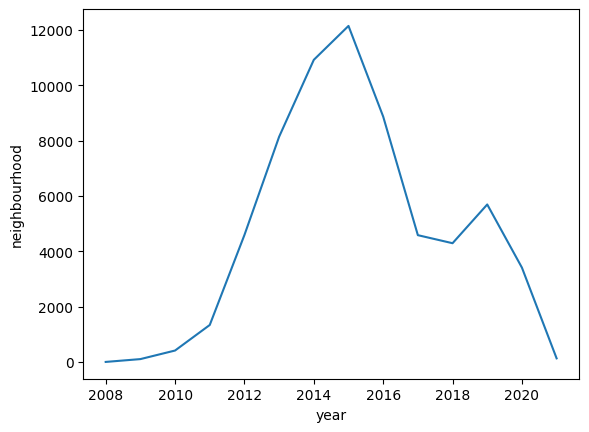

In [289]:
sns.lineplot(data = paris_listings_over_time_on_neighbour, x = "year", y = "neighbourhood")

In [ ]:
#Conclusion 
# By analyzing this table, we can understand the growth rate of new hosts over time. Also, Is there a trend?
# It appears that there was a consistent increase in new hosts from 2008 to 2015. 
# During this period, more and more people were joining the platform, likely attracted by the opportunity to earn income by hosting their properties. 
# However, things took a turn after 2015 when government regulations and rules were put in place.

In [ ]:
#8 Create a table called paris_listings_over_time_on_price grouped by the ‘host_since’ year
# Calculate the average price over years.

In [286]:
paris_listings_over_time_on_price = paris_data.groupby("year").agg({"price":"mean"}).sort_values(by = "price", ascending = False) 
paris_listings_over_time_on_price

,price
year,
2009,159.641509
2020,141.456038
2018,138.209362
2019,129.757113
2010,125.031250
2011,124.828230
2016,114.159847
2012,111.578615
2017,108.658888


<Axes: xlabel='year', ylabel='price'>

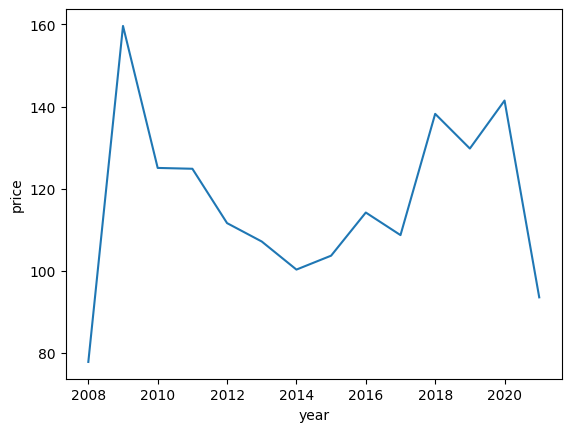

In [288]:
sns.lineplot(data = paris_listings_over_time_on_price, x = "year", y = "price")

In [ ]:
#Conclusion 
# This table provides insights into how listing prices have changed over time. Are prices increasing or decreasing?
# Initially, in the debut year (2008), listing prices moves upward dramatically.
# As more hosts joined the business, prices gracefully adjusted downward, finding equilibrium. 
# But then, in 2014, the government stepped in between, introducing regulations. 
# Suddenly, prices regained their poise.
# The pandemic, however, executed an unexpected spin—prices sharply.